In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.stats import norm


In [23]:
# 概率从 0 到 1，间隔 step

# step = 0.01

# x = []
# a = 0.0000001
# while a<= 1: 
#     x.append(a)
#     a = a + step
    
# x.append(0.9999999)

x = np.linspace(0.0000001, 0.99999999, num=100)
    

In [24]:
# 投硬币，一共 total 次，正面 positive 次，设正面概率 theta
# 每次都是独立，要么是 theta，要么是 1-theta，所以是 10 次 概率的连乘；
# 连乘会下溢，所以 先取对数，再算指数
def likelihoodFactory(total, positive):
    def inner(theta): 
        a = positive * math.log(theta) + (total - positive) * math.log(1 - theta)
        b = math.exp(a)
        return b
    return inner 


In [25]:
# 设置投币的次数，以及正面的次数
total = 100
positive = 70

likelihood = likelihoodFactory(total, positive)

# 这里如果考虑 先验概率，那么 就是计算最大后验估计；可以观察 10/7, 100/70, 1000/700 三种情况下，后验估计的差别；
# 后验估计，其实就是 贝叶斯估计，也即：实现有一个判断，然后根据新的信息，调整原来的判断；

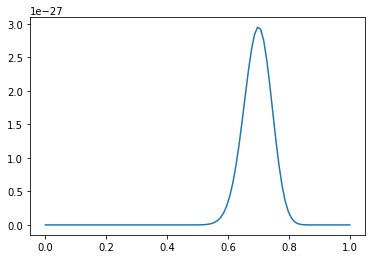

In [26]:
# 最大似然估计 MLE
# 这种情况是不考虑 prior 概率的，也即：认为先验概率都一样
y1 = [ likelihood(theta) for theta in x  ]
plt.plot(x, y1)
plt.show()

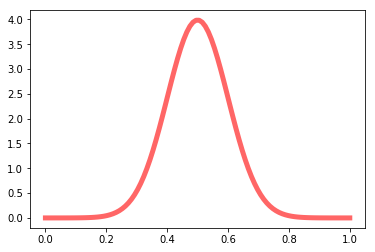

In [27]:
# 假设 theta 服从正态分布，也即：prior 先验概率
p = norm(0.5, 0.1)
plt.plot(x, p.pdf(x), 'r-', lw=5, alpha=0.6)

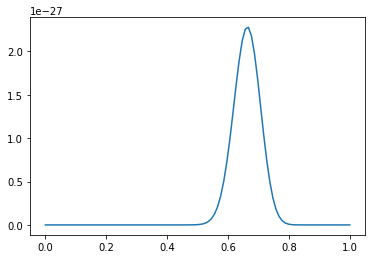

In [28]:
# 最大后验估计
y2 = [p.pdf(theta) * likelihood(theta) for theta in x  ]

plt.plot(x, y2)
plt.show()